<a href="https://colab.research.google.com/github/wakii/ds_parrot/blob/master/parraot_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Classification with Decision Tree

## Parrot 2기 최우혁

## 환경 셋팅

### library import

In [0]:
!pip install sklearn

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data 불러오기 및 확인

In [0]:
# import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';' )
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';' )

In [0]:
red.info()
red.head()

In [0]:
white.info()
white.head()

## Data 전처리


- Labelling
  - red => 0
  - white => 1

In [0]:
red['type'] = 0
white['type'] = 1

In [0]:
red.info()
# red.isnull().sum()
white.isnull().sum()

- target label : type
- information : other columns

- 결측값 없음

In [0]:
red.describe()

## 시각화

#### red wine

In [0]:
corrmat = red.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat , vmax=.8, square = True)

- 상관관계가 높은 정보들
  - fixed acidity, citric acid - PH
  - volatile acidity - citric acid
  - density - alcohol


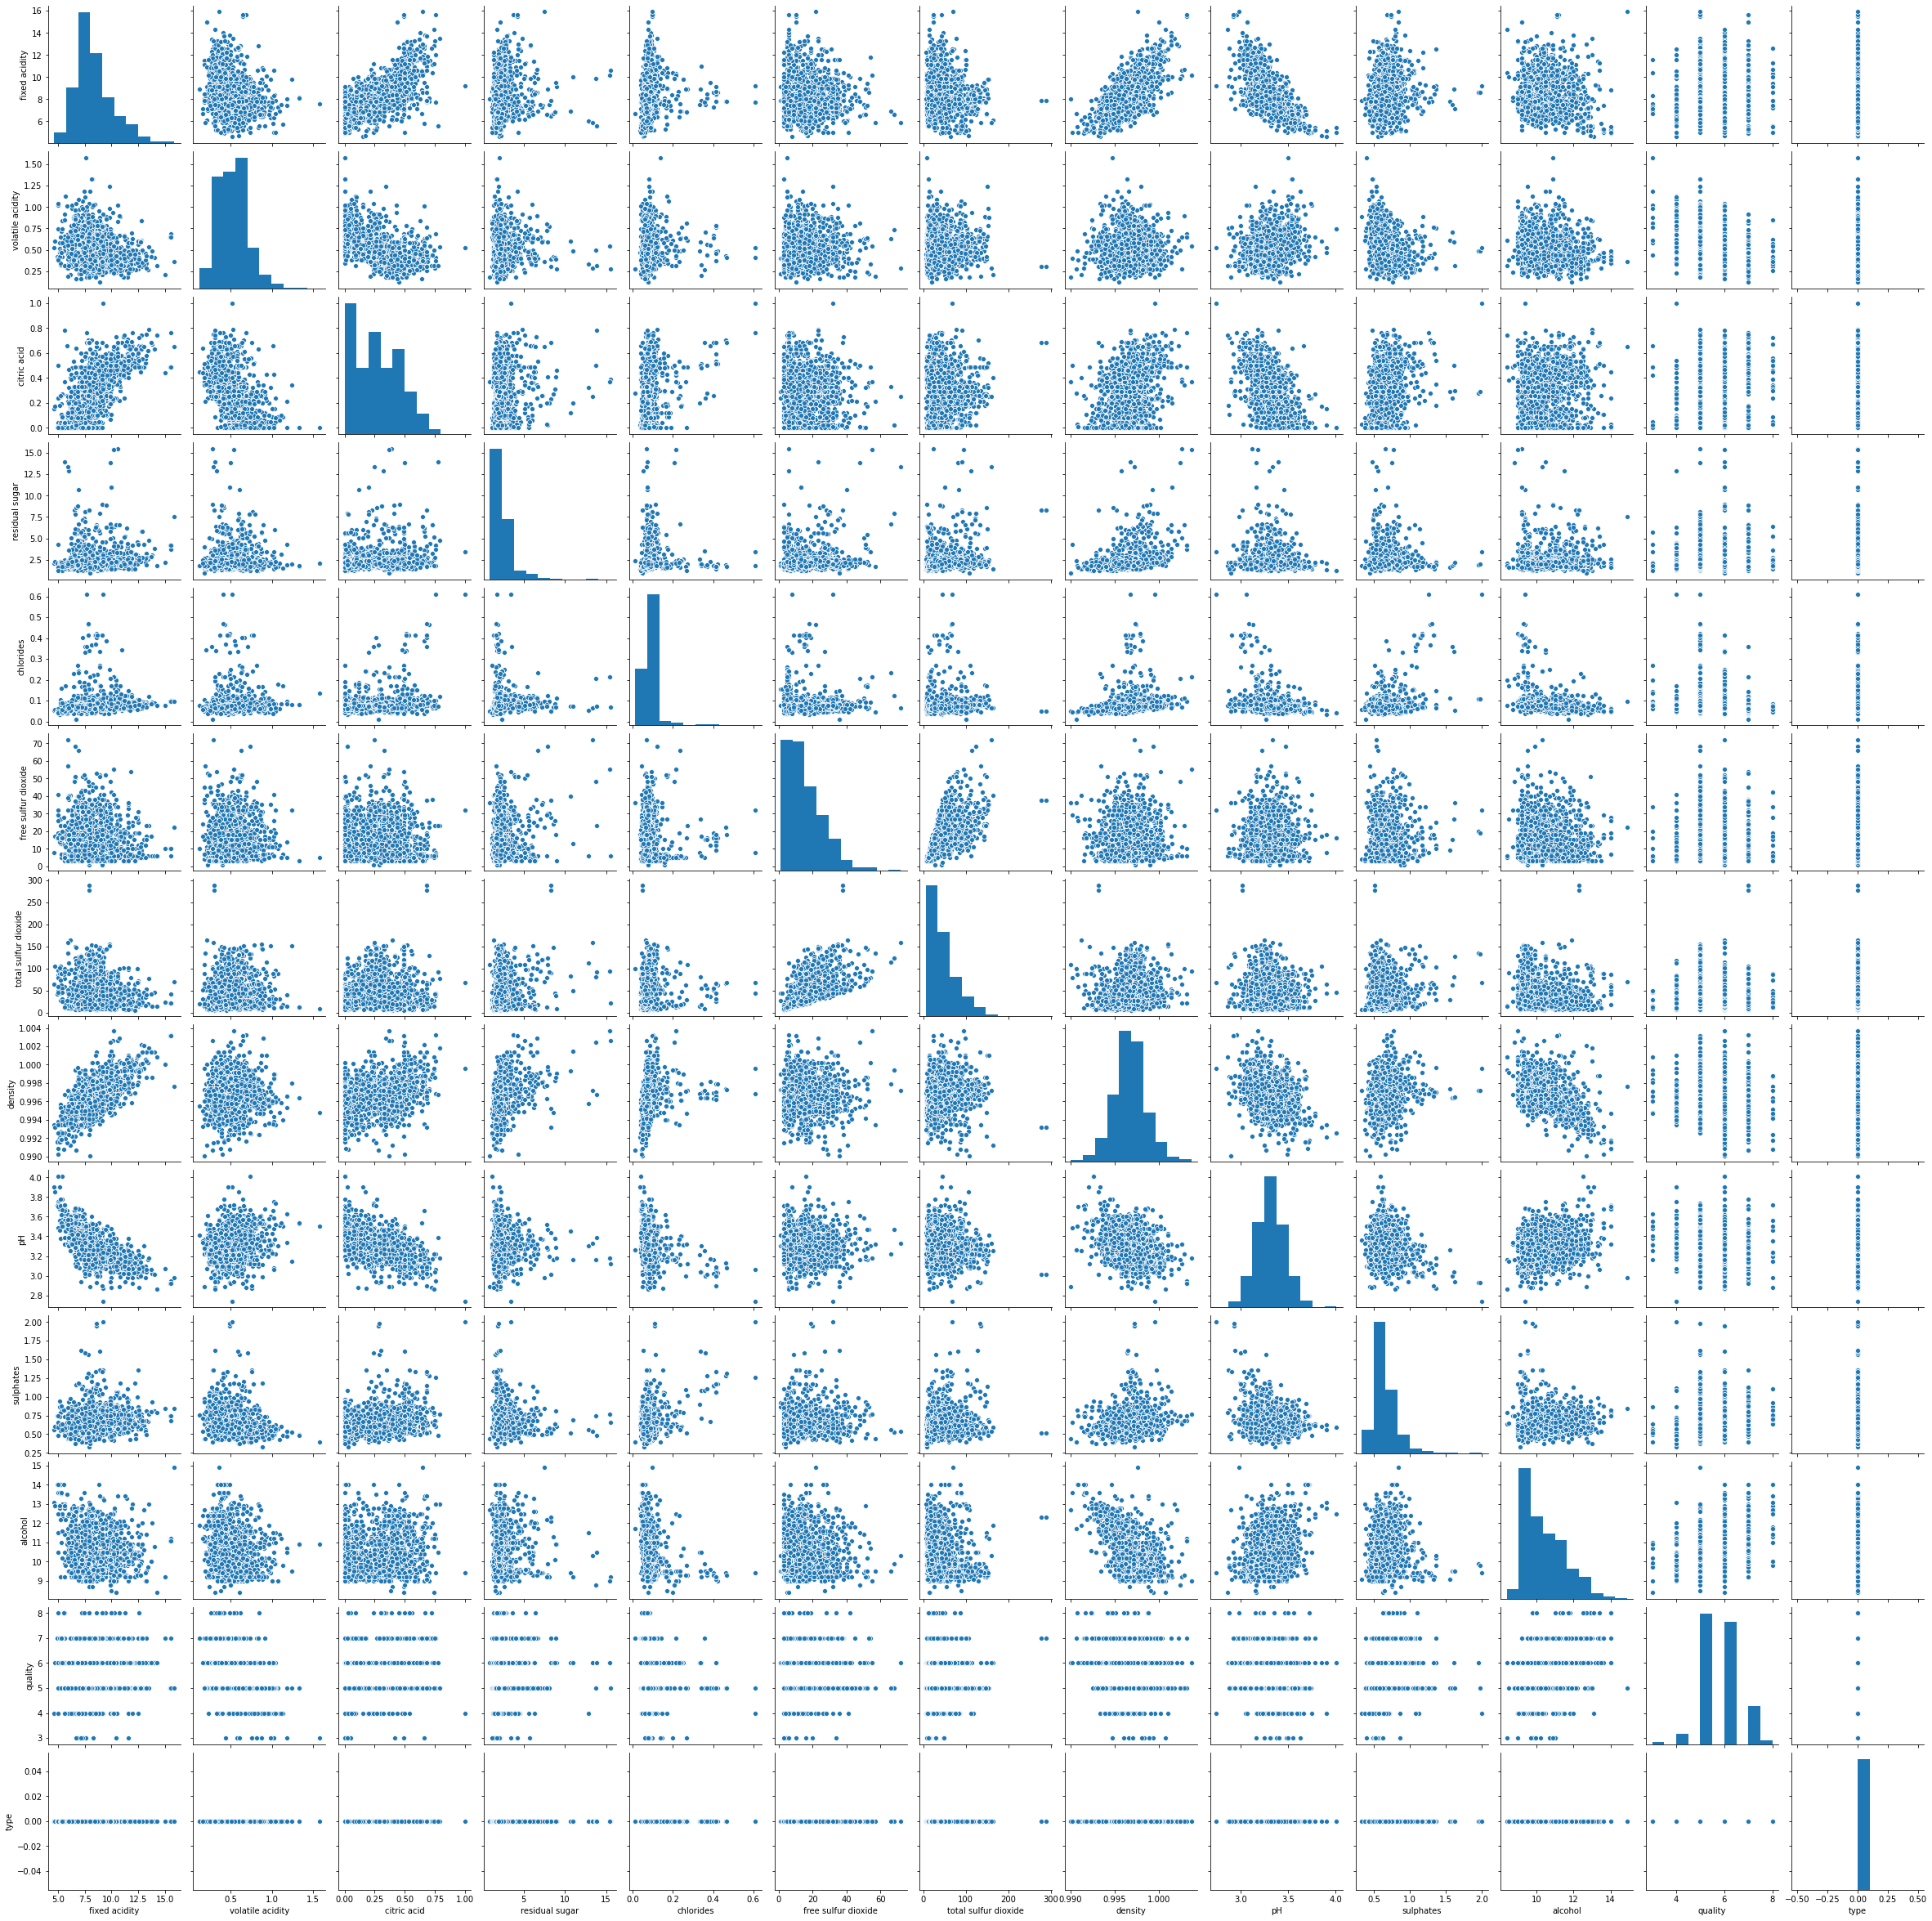

In [73]:
sns.pairplot(red)
# plt.title('Red Wine의 Pair plot')
# plt.show()

#### 히스토그램

- `seaborn.distplot` : Flexibly plot a univariate distribution of observations. 
  - matplotlib의 histogram + seaborn의 kernel density를 보여주는 kdeplot

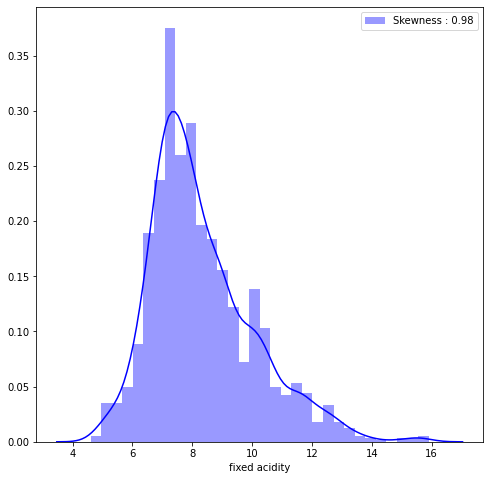

In [74]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
g = sns.distplot(red['fixed acidity'], color='b', label='Skewness : {:.2f}'.format(red['fixed acidity'].skew()), ax = ax)
g = g.legend(loc = 'best')

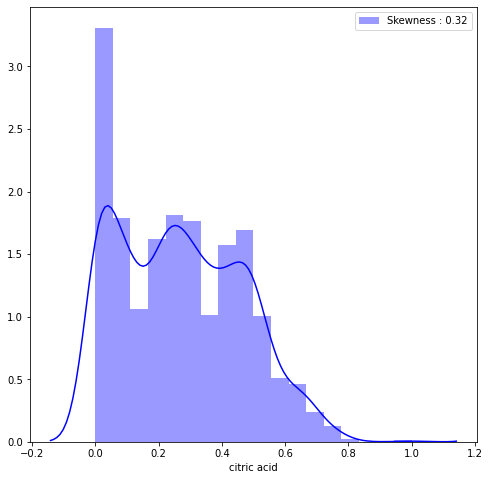

In [75]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
g = sns.distplot(red['citric acid'], color='b', label='Skewness : {:.2f}'.format(red['citric acid'].skew()), ax = ax)
g = g.legend(loc = 'best')

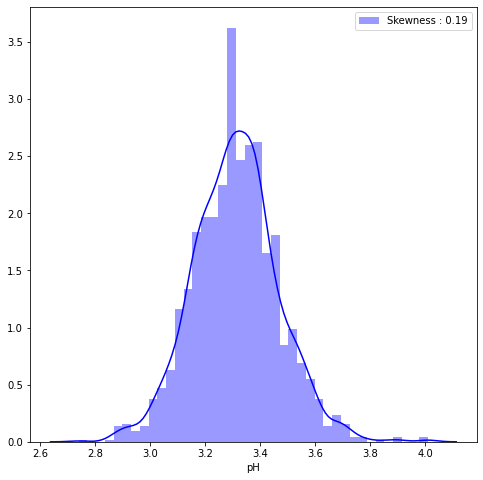

In [76]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
g = sns.distplot(red['pH'], color='b', label='Skewness : {:.2f}'.format(red['pH'].skew()), ax = ax)
g = g.legend(loc = 'best')

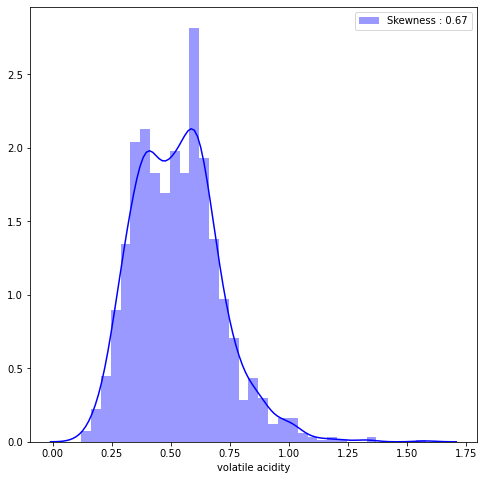

In [77]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
g = sns.distplot(red['volatile acidity'], color='b', label='Skewness : {:.2f}'.format(red['volatile acidity'].skew()), ax = ax)
g = g.legend(loc = 'best')

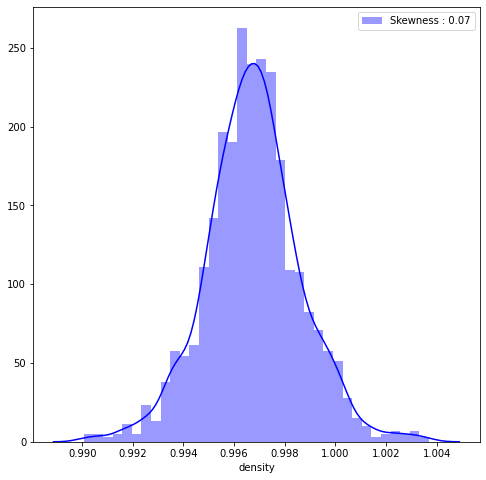

In [78]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
g = sns.distplot(red['density'], color='b', label='Skewness : {:.2f}'.format(red['density'].skew()), ax = ax)
g = g.legend(loc = 'best')

#### White Wine

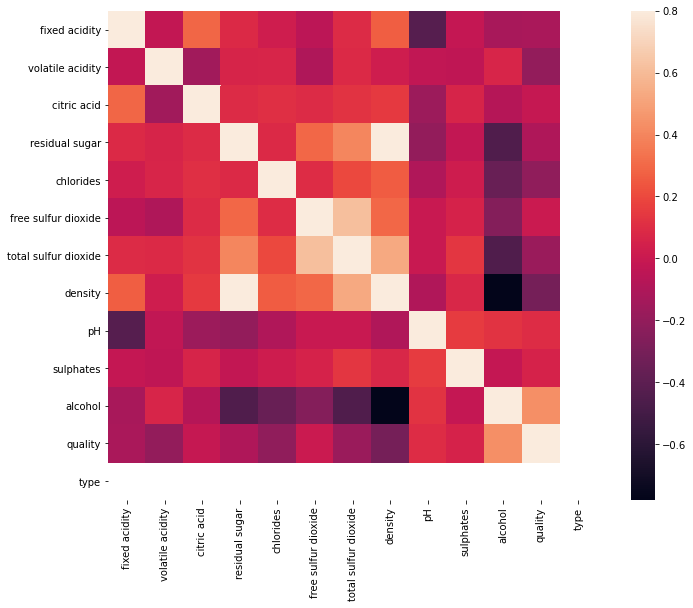

In [79]:
corrmat = white.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat , vmax=.8, square = True)

- 상관관계가 높은 정보들
  - fixed acidity - pH
  - density - alcohol

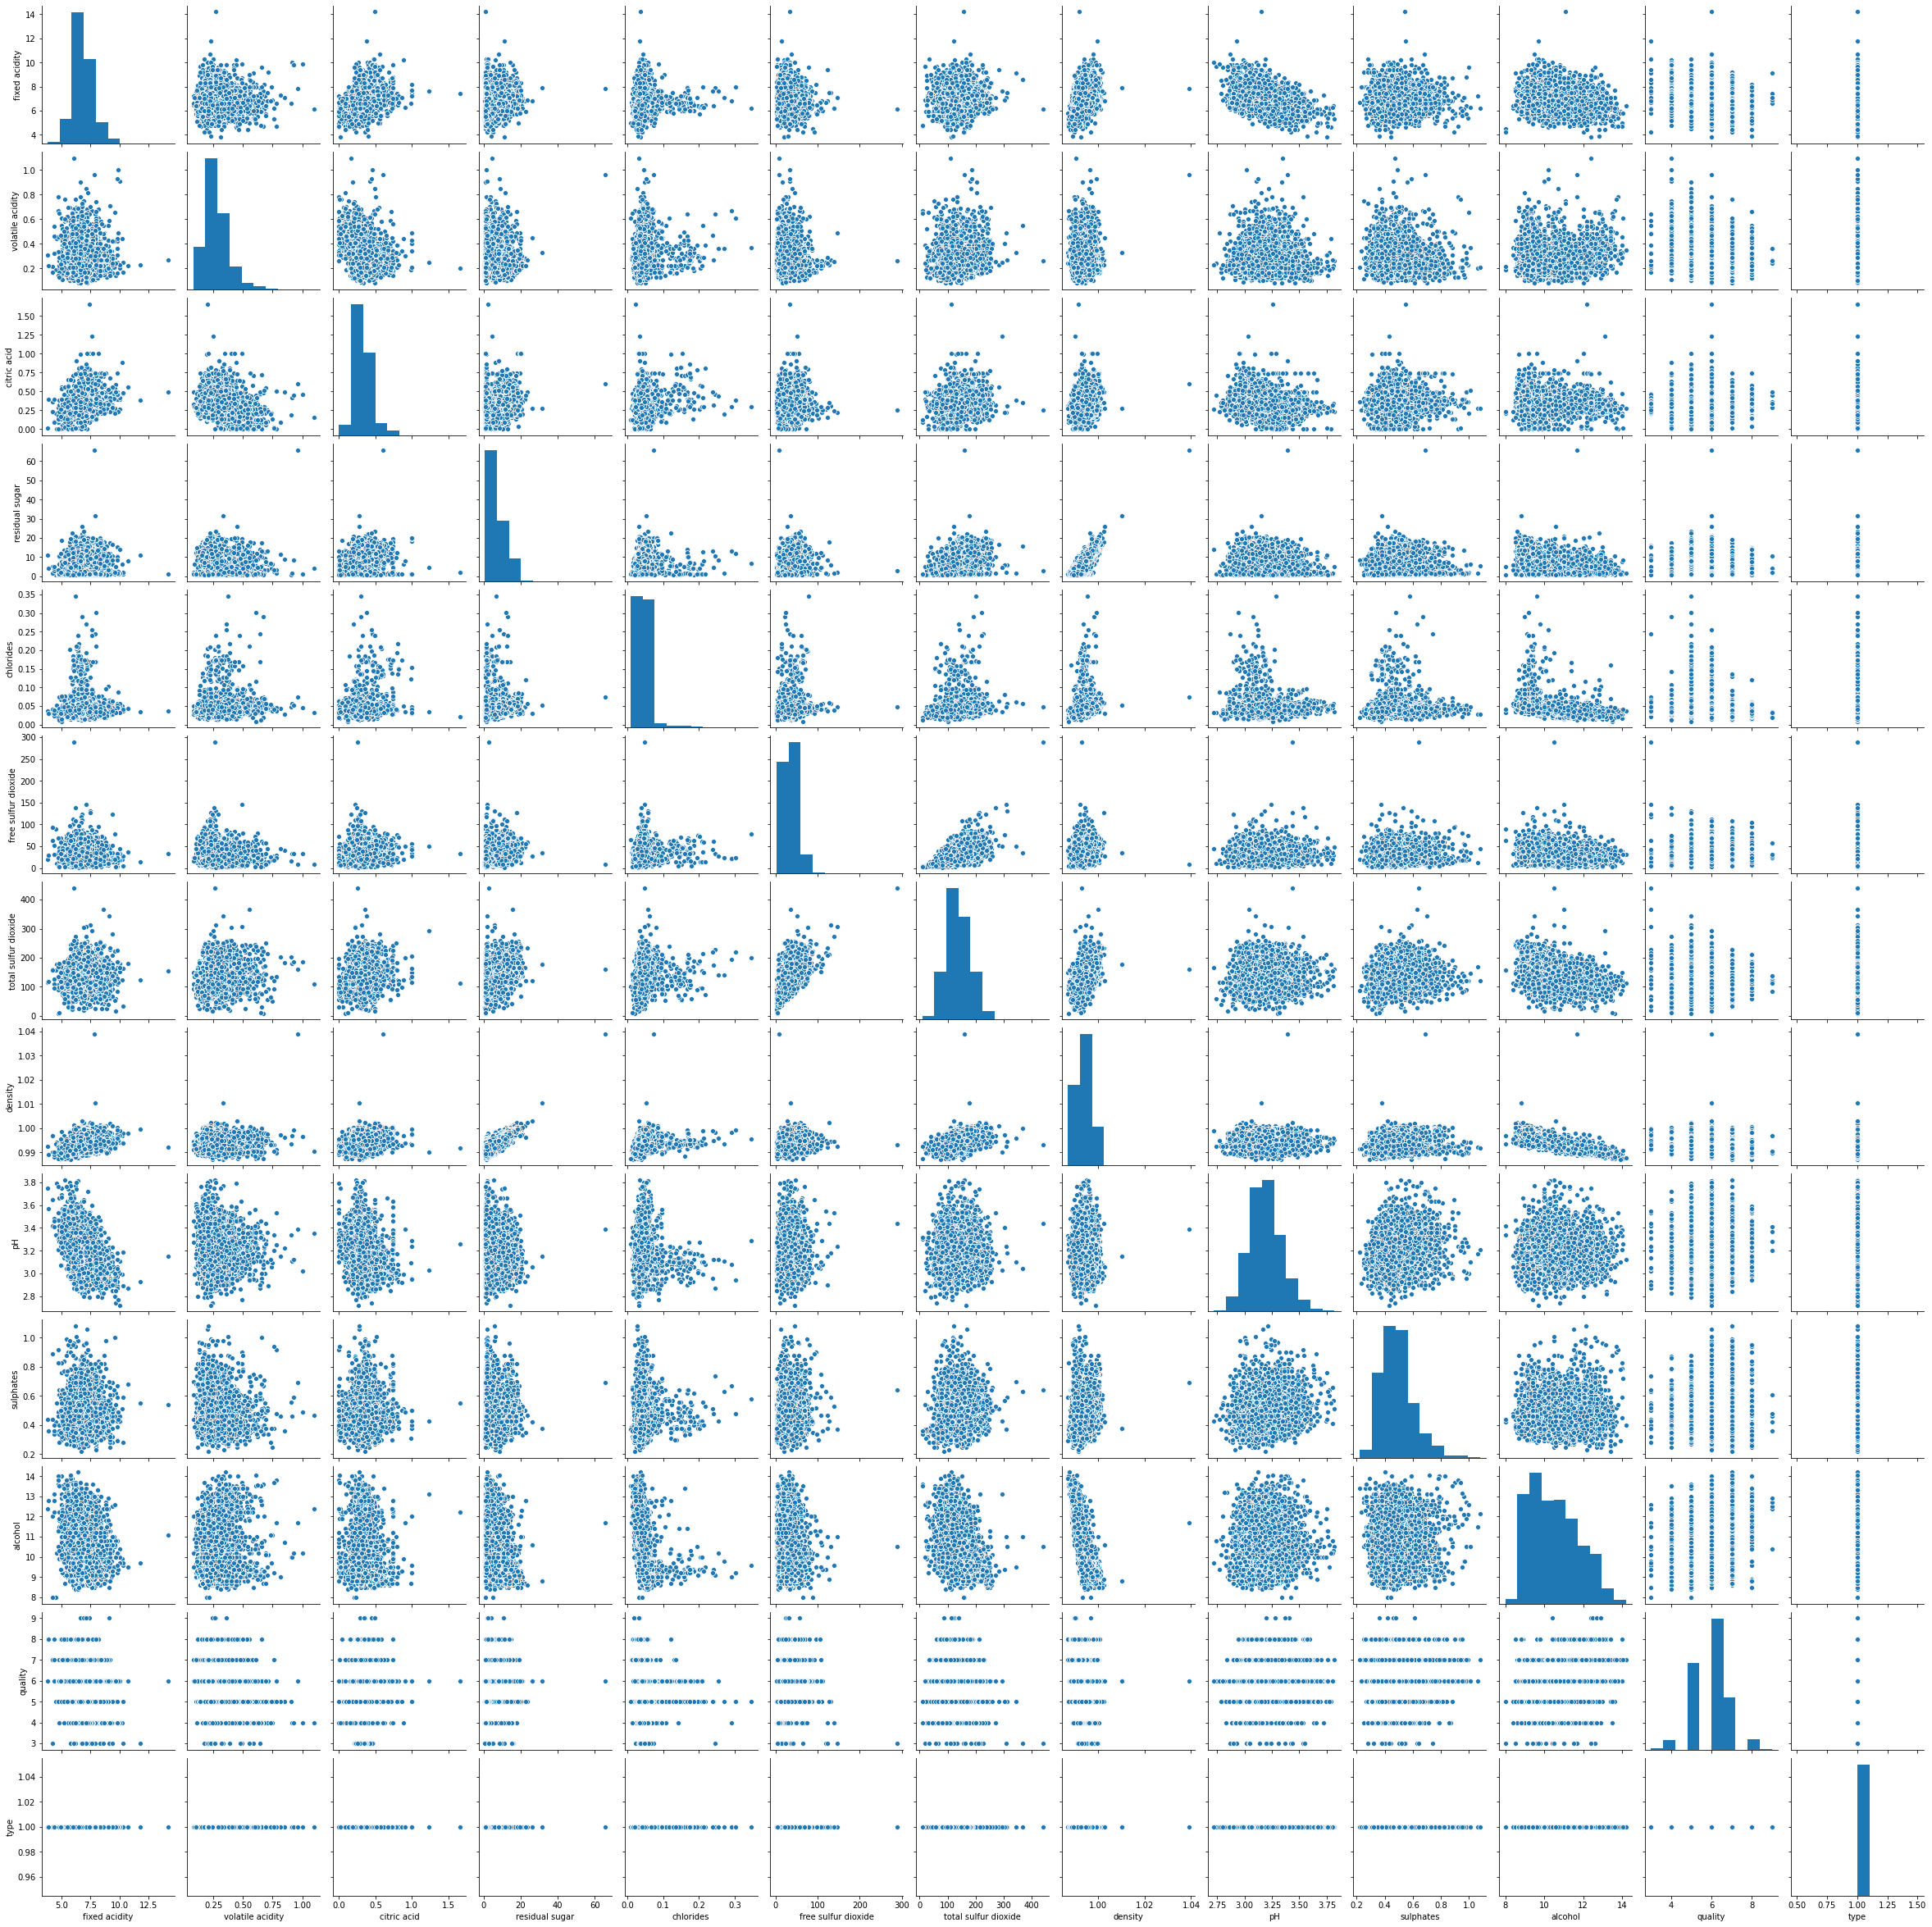

In [80]:
sns.pairplot(white)

### 전체 data

### data 합치기

In [81]:
raw_data = pd.concat([red,white])
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [82]:
raw_data.describe()

fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75%         7.700000          0.400000  ...     6.000000     1.000000
max        15.900000          1.580000  ...     9.000000     1.000000

[8 rows x 13 columns]

### 시각화


#### 상관관계

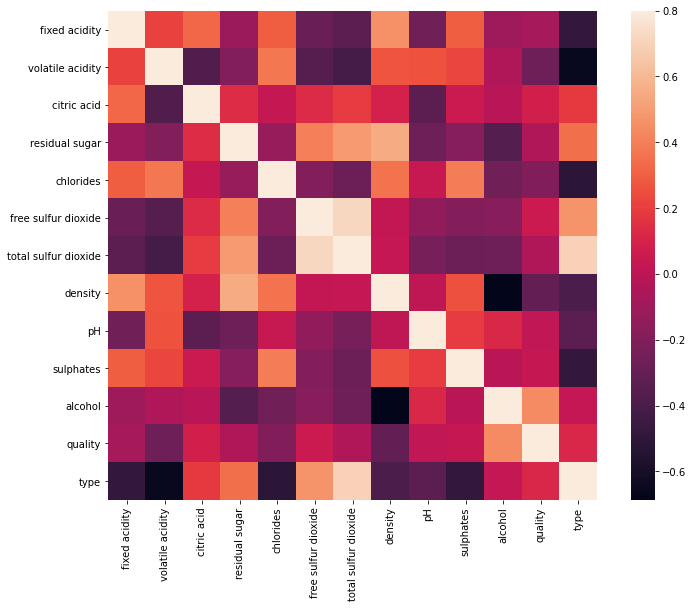

In [83]:
corrmat = raw_data.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat , vmax=.8, square = True)

- target label(Type)과 상관관계가 높은 변수들
  - volatile acidity
  - chlorides
  - sulphates

In [0]:
sns.pairplot(raw_data, hue="type", palette="Set2", diag_kind="kde")

- skewness가 너무 반영 된 것 같고, white의 Data의 갯수가 더 많아 확연히 보는 것이 쉽지가 않다.
- 그럼에도 ph, alcohol, quality를 제외하고는 wine의 종류에 따라 각 변수간 상관관계들이 서로 차이가 많이 나는 것처럼 보인다.

- 상관관계를 본 heatmap에서 뽑아낸 type과 상관관계가 높은 변수들(chlorides, volatile acid,sulphates)들은 확연히 분포가 차이 나는 것 같다.


### 더 자세한 시각화 그래프

In [0]:
raw_data['chlorides'] = raw_data['chlorides'].map(lambda i:np.log(i) if i>0 else 0)
raw_data['sulphates'] = raw_data['sulphates'].map(lambda i:np.log(i) if i>0 else 0)
raw_data['volatile acidity'] = raw_data['volatile acidity'].map(lambda i:np.log(i) if i>0 else 0)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


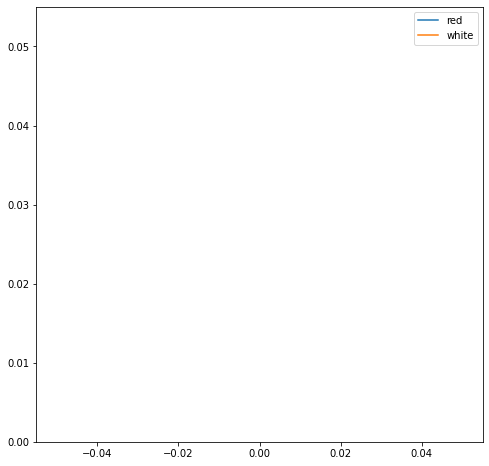

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.kdeplot(raw_data[raw_data['type']==0]['chlorides'], ax = ax)
sns.kdeplot(raw_data[raw_data['type']==1]['chlorides'], ax = ax)
plt.legend(['red','white'])
plt.show()

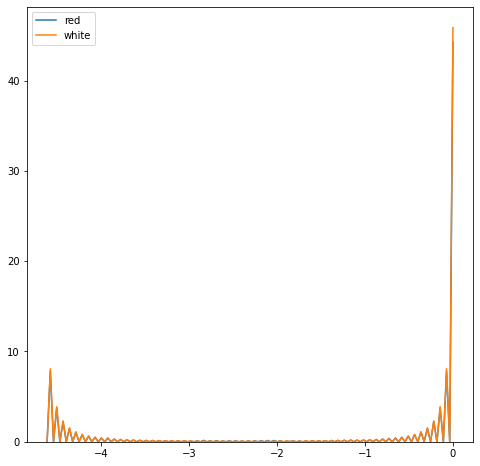

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.kdeplot(raw_data[raw_data['type']==0]['sulphates'], ax = ax)
sns.kdeplot(raw_data[raw_data['type']==1]['sulphates'], ax = ax)
plt.legend(['red','white'])
plt.show()

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.kdeplot(raw_data[raw_data['type']==0]['sulphates'], ax = ax)
sns.kdeplot(raw_data[raw_data['type']==1]['sulphates'], ax = ax)
plt.legend(['red','white'])
plt.show()

In [0]:
raw_data = raw_data[['survived', 'pclass','sex','age','sibsp','parch','fare']].dropna()
train_pre = raw_data[['pclass','sex','age','sibsp','parch','fare']].dropna()

train_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1045 non-null   int64  
 1   sex     1045 non-null   int64  
 2   age     1045 non-null   float64
 3   sibsp   1045 non-null   int64  
 4   parch   1045 non-null   int64  
 5   fare    1045 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 57.1 KB


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_pre, raw_data[['survived']], test_size=0.2, random_state=13)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=3, random_state=13)
tree.fit(x_train, y_train)

train_score = tree.score(x_train, y_train)
test_score = tree.score(x_test, y_test)

predict_y = tree.predict(x_test) # x_train을 넣은 결과가 y_train / x_test를 넣은 결과가 y_test
print('Score1: {}'.format(tree.score(x_train, y_train)))
print('Score2: {}'.format(tree.score(x_test, y_test)))

Score1: 0.8074162679425837
Score2: 0.7799043062200957


In [0]:
#             생존 O | 생존 X
# 생존 O 예측    104     17
# 생존 X 예측    29      59

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_y)

array([[104,  17],
       [ 29,  59]])

In [0]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=3, random_state=0), n_estimators=100, random_state=0).fit(x_train, y_train)

print('Score1: {}'.format(bagging.score(x_train, y_train)))
print('Score2: {}'.format(bagging.score(x_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score1: 0.8241626794258373
Score2: 0.784688995215311


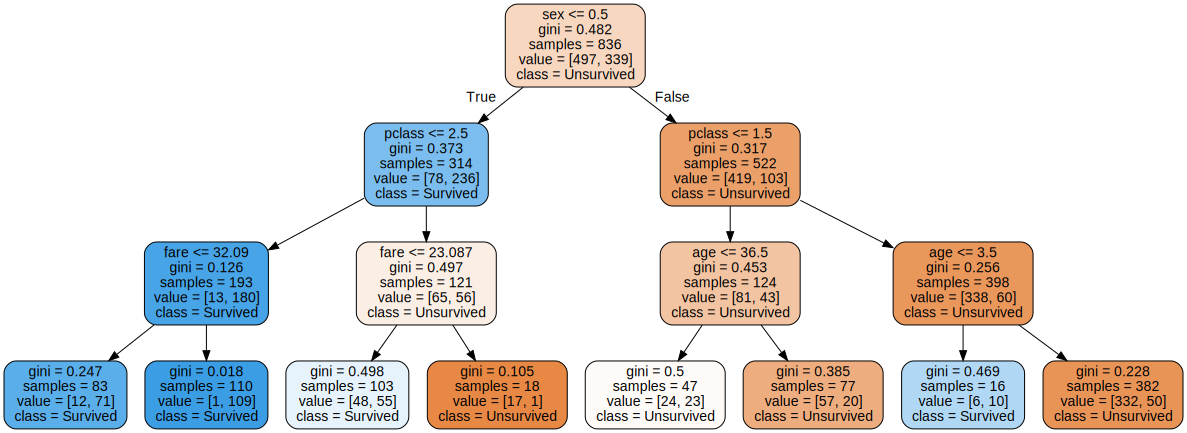

In [0]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree,
        out_file="titanic.dot",
        feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot